# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# EDA

In [2]:
data = pd.read_csv("drug200.csv")
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [4]:
bins_Na_to_K = [5, 10, 15, 40]

categories_Na_to_K = pd.cut(data['Na_to_K'], bins_Na_to_K)

print(categories_Na_to_K)

0      (15, 40]
1      (10, 15]
2      (10, 15]
3       (5, 10]
4      (15, 40]
         ...   
195    (10, 15]
196    (10, 15]
197     (5, 10]
198    (10, 15]
199    (10, 15]
Name: Na_to_K, Length: 200, dtype: category
Categories (3, interval[int64, right]): [(5, 10] < (10, 15] < (15, 40]]


In [5]:
bins_Age = [15, 25, 35, 45, 55, 65, 75]

categories_Age = pd.cut(data['Age'], bins_Age)

print(categories_Age)

0      (15, 25]
1      (45, 55]
2      (45, 55]
3      (25, 35]
4      (55, 65]
         ...   
195    (55, 65]
196    (15, 25]
197    (45, 55]
198    (15, 25]
199    (35, 45]
Name: Age, Length: 200, dtype: category
Categories (6, interval[int64, right]): [(15, 25] < (25, 35] < (35, 45] < (45, 55] < (55, 65] < (65, 75]]


In [6]:
data['Na_to_K'] = categories_Na_to_K
data['Age'] = categories_Age
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,"(15, 25]",F,HIGH,HIGH,"(15, 40]",DrugY
1,"(45, 55]",M,LOW,HIGH,"(10, 15]",drugC
2,"(45, 55]",M,LOW,HIGH,"(10, 15]",drugC
3,"(25, 35]",F,NORMAL,HIGH,"(5, 10]",drugX
4,"(55, 65]",F,LOW,HIGH,"(15, 40]",DrugY


# Encoding Categorical Data

In [7]:
le = LabelEncoder()

In [8]:
data["Drug"] = le.fit_transform(data["Drug"])
data.head()
# DrugY = 0, DrugA = 1, DrugB = 2, DrugC = 3, DrugX = 4  

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,"(15, 25]",F,HIGH,HIGH,"(15, 40]",0
1,"(45, 55]",M,LOW,HIGH,"(10, 15]",3
2,"(45, 55]",M,LOW,HIGH,"(10, 15]",3
3,"(25, 35]",F,NORMAL,HIGH,"(5, 10]",4
4,"(55, 65]",F,LOW,HIGH,"(15, 40]",0


In [9]:
data["Sex"] = le.fit_transform(data["Sex"])
data.head()
# F = 0, M = 1

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,"(15, 25]",0,HIGH,HIGH,"(15, 40]",0
1,"(45, 55]",1,LOW,HIGH,"(10, 15]",3
2,"(45, 55]",1,LOW,HIGH,"(10, 15]",3
3,"(25, 35]",0,NORMAL,HIGH,"(5, 10]",4
4,"(55, 65]",0,LOW,HIGH,"(15, 40]",0


In [10]:
data["BP"] = le.fit_transform(data["BP"])
data.head()
# High = 0, Low = 1, Normal = 2

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,"(15, 25]",0,0,HIGH,"(15, 40]",0
1,"(45, 55]",1,1,HIGH,"(10, 15]",3
2,"(45, 55]",1,1,HIGH,"(10, 15]",3
3,"(25, 35]",0,2,HIGH,"(5, 10]",4
4,"(55, 65]",0,1,HIGH,"(15, 40]",0


In [11]:
data["Cholesterol"] = le.fit_transform(data["Cholesterol"])
data.head()
# High = 0, Normal = 1

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,"(15, 25]",0,0,0,"(15, 40]",0
1,"(45, 55]",1,1,0,"(10, 15]",3
2,"(45, 55]",1,1,0,"(10, 15]",3
3,"(25, 35]",0,2,0,"(5, 10]",4
4,"(55, 65]",0,1,0,"(15, 40]",0


In [12]:
data["Age"] = le.fit_transform(data["Age"])
data.head()
# (15, 25) = 0, (25, 35) = 1, (35, 45) = 2, (45, 55) = 3, (55, 65) = 4, (65, 75) = 5

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0,0,0,0,"(15, 40]",0
1,3,1,1,0,"(10, 15]",3
2,3,1,1,0,"(10, 15]",3
3,1,0,2,0,"(5, 10]",4
4,4,0,1,0,"(15, 40]",0


In [13]:
data["Na_to_K"] = le.fit_transform(data["Na_to_K"])
data.head()
# (5, 10) = 0, (10, 15) = 1, (15, 40) = 2

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0,0,0,0,2,0
1,3,1,1,0,1,3
2,3,1,1,0,1,3
3,1,0,2,0,0,4
4,4,0,1,0,2,0


# Analyzing Data

In [14]:
Dy=data[data['Drug'] == 0]
Dy.describe()

#We can see that DrugY doesn't have an easy to observe pattern, but by focusing more we can see "of course in comparison with 
#other drugs" that Na_to_K ratio in DrugY starts at least from 15 while the other drugs their maximum Na_to_K are less than 15.
    #So, maybe we can put a rule for DrugY --> Any patient has at least Na_to_K = 15 then he must take DrugY.

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,91.000000,91.000000,91.000000,91.000000,91.0,91.0
mean,2.494505,0.483516,0.835165,0.483516,2.0,0.0
std,1.721586,0.502497,0.806415,0.502497,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,2.0,0.0
25%,1.000000,0.000000,0.000000,0.000000,2.0,0.0
50%,2.000000,0.000000,1.000000,0.000000,2.0,0.0
75%,4.000000,1.000000,1.500000,1.000000,2.0,0.0
max,6.000000,1.000000,2.000000,1.000000,2.0,0.0


In [15]:
Da=data[data['Drug'] == 1]
Da.describe()

#Easy pattern here for DrugA, compared with DrugB "I will discuss DrugB in the next cell", DrugA is used for patients whom blood
#pressure is high, and there's another condition, age of patient must be at maximum = 50, maybe DrugA causes damage to elderly
#patients, that's why they take DrugB not DrugA.
    #DrugA rule --> Any patinet his blood pressure is high and has 50 years at maximum should take DrugA.


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,23.000000,23.000000,23.0,23.000000,23.000000,23.0
mean,1.565217,0.608696,0.0,0.478261,0.695652,1.0
std,1.036870,0.499011,0.0,0.510754,0.470472,0.0
min,0.000000,0.000000,0.0,0.000000,0.000000,1.0
25%,1.000000,0.000000,0.0,0.000000,0.000000,1.0
50%,2.000000,1.000000,0.0,0.000000,1.000000,1.0
75%,2.000000,1.000000,0.0,1.000000,1.000000,1.0
max,3.000000,1.000000,0.0,1.000000,1.000000,1.0


In [16]:
Db=data[data['Drug'] == 2]
Db.describe()

#Small change of DrugA, DrugB is also used to anyone his blood pressure is high, but with age at minimum 51.
    #So, DrugB rule --> Any patient with high blood pressure, but has at least 51 years.

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,16.0000,16.000,16.0,16.000000,16.000000,16.0
mean,4.1875,0.625,0.0,0.500000,0.687500,2.0
std,0.7500,0.500,0.0,0.516398,0.478714,0.0
min,3.0000,0.000,0.0,0.000000,0.000000,2.0
25%,4.0000,0.000,0.0,0.000000,0.000000,2.0
50%,4.0000,1.000,0.0,0.500000,1.000000,2.0
75%,5.0000,1.000,0.0,1.000000,1.000000,2.0
max,5.0000,1.000,0.0,1.000000,1.000000,2.0


In [17]:
Dc=data[data['Drug'] == 3]
Dc.describe()

#Easy pattern here, any patient whose blood pressure is low and cholestrol level is high, should take DrugC, regarding Age, Sex
#and Na_to_K percentage.
    #So, DrugC rule --> Any patient whose blood pressure is low and cholestrol level is high.

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,16.000000,16.000000,16.0,16.0,16.000000,16.0
mean,2.375000,0.562500,1.0,0.0,0.750000,3.0
std,1.707825,0.512348,0.0,0.0,0.447214,0.0
min,0.000000,0.000000,1.0,0.0,0.000000,3.0
25%,1.000000,0.000000,1.0,0.0,0.750000,3.0
50%,3.000000,1.000000,1.0,0.0,1.000000,3.0
75%,3.250000,1.000000,1.0,0.0,1.000000,3.0
max,5.000000,1.000000,1.0,0.0,1.000000,3.0


In [18]:
Dx=data[data['Drug'] == 4]
Dx.describe()

#That's maybe the most challenging one to analyze, it works with blood pressure Normal or Low, it works with Cholestrol High or
#Normal, No pattern in Sex, Age, and Na_to_K percentage is lower than 15.
#---------------------------------------------------------------------------------------------------------------------------------
#By comparing to other Drugs:
#- DrugY is the most used Drug in the dataset and maybe it's the most important drug bec. it's the only drug that solves the 
#problem of having large Na_to_K ratio, regarding any other factor "let's just say it's a universal drug like blood type O"
#- Drugs A and B, work with high blood pressure, but the difference is that B works in a large scale of age "51 at minimum", 
#while A works with a fewer scale "50 at maximum"
#- DrugC may be the one we could replace with DrugX, DrugC works with patients whose blood level is low and their cholestrol is 
#high, while DrugX works with blood pressure Normal or Low, also works with Cholestrol High or Normal, which can DrugC is 
#subseted from it.


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.0
mean,2.481481,0.500000,1.666667,0.629630,0.592593,4.0
std,1.701728,0.504695,0.475831,0.487438,0.495966,0.0
min,0.000000,0.000000,1.000000,0.000000,0.000000,4.0
25%,1.000000,0.000000,1.000000,0.000000,0.000000,4.0
50%,2.500000,0.500000,2.000000,1.000000,1.000000,4.0
75%,4.000000,1.000000,2.000000,1.000000,1.000000,4.0
max,6.000000,1.000000,2.000000,1.000000,1.000000,4.0


In [19]:
X = data.drop("Drug", axis = 1)
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,0,0,0,0,2
1,3,1,1,0,1
2,3,1,1,0,1
3,1,0,2,0,0
4,4,0,1,0,2
...,...,...,...,...,...
195,4,0,1,0,1
196,0,1,1,0,1
197,3,1,2,0,0
198,0,1,2,1,1


In [20]:
y = data[["Drug"]]
y.head()

,Drug
0,0
1,3
2,3
3,4
4,0


# Training Model

In [395]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

<Axes: >

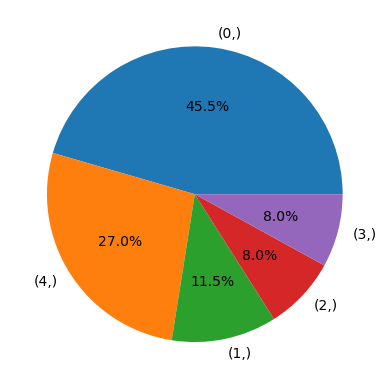

In [396]:
y.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [407]:
log_reg = LogisticRegression(penalty = 'l2', C = 0.001, max_iter = 1000)
log_reg.fit(X_train, y_train)

F:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.001, max_iter=1000)

In [408]:
y_pred = log_reg.predict(X_test)

In [409]:
f1 = f1_score(y_test, y_pred, average = 'weighted')
f1

0.262015503875969

# Smotting

In [410]:
smote = SMOTE()

In [411]:
X_smote, y_smote = smote.fit_resample(X, y)

<Axes: >

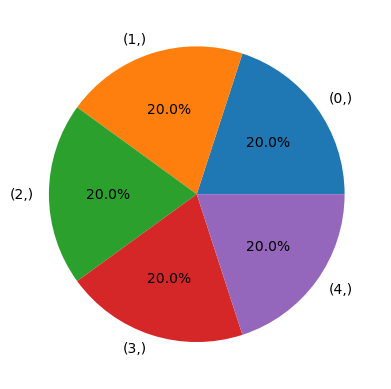

In [412]:
y_smote.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [413]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [414]:
log_reg_smote = LogisticRegression(penalty ='l2', C=0.1, max_iter=1000)
log_reg_smote.fit(X_train_smote, y_train_smote)

F:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, max_iter=1000)

In [415]:
y_pred_smote = log_reg_smote.predict(X_test_smote)

In [416]:
f1_smote = f1_score(y_test_smote, y_pred_smote, average = 'weighted')
f1_smote

0.9782410781084521